<a href="https://www.kaggle.com/code/rambertojrsosacueto/case-study-cyclistic-bike-sharing-company?scriptVersionId=123220469" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Business Task

The task is to create a new marketing strategy that will turn occasional riders into annual subscribers for Cyclistic, a hypothetical Company. The company's director of marketing believes that increasing the number of yearly subscriptions is crucial for the long-term success of the company. To achieve this goal, my marketing analyst team, also hypothetical, must understand why casual riders would want to become members, and how annual members use Cyclistic bikes differently from occasional riders. To gain insights that can guide the development of the new marketing strategy, we plan to analyze past bike trip data from Cyclistic. Our aim is to identify patterns and insights that can help us produce compelling data visualizations and expert insights. These visualizations and insights will be used to convince Cyclistic's management to approve the new marketing strategy.

# Description of Data Source

The primary data source for this project is historical bicycle trip data from Cyclistic, which can be downloaded via the provided link, https://divvy-tripdata.s3.amazonaws.com/index.html. The dataset includes information about bike trips taken in the past 12 months, a total of 5,754,248 observations, such as:

• Ride ID
• Rideable type
• Trip, start time (Include Date and Time in one cell)
• Trip, end time (Include Date and Time in one cell)
• Trip start station name
• Start station ID
• Trip end station name
• End station ID
• Start Latitude
• Start Longitude
• End Latitude
• End Longitude

# Data cleaning, Transformation & Manipulation

In [1]:
# Loading Data Cleaning Libraries 

library(tidyverse) # Collection of packages for data manipulation, visualization, and analysis.
library(dplyr) # Package for data manipulation and transformation.
library(readr) # Package for reading and parsing data from files.
library(lubridate) # Package for working with dates and times.
library(ggplot2) # Package for creating high-quality graphics and visualizations.


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Opening csv files containing dataset with readr

table_1 <- "/kaggle/input/google-casestudy-1-2022-2023/202202-divvy-tripdata.csv"
cyclistic_data2202 <- read_csv(table_1)
head(cyclistic_data2202)

Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.88462,-87.62783,41.91569,-87.63460,member
1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.92914,-87.64908,41.92877,-87.66391,member
BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.88462,-87.62783,41.87926,-87.63990,member
A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.94815,-87.66394,41.95283,-87.64999,member
07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.88462,-87.62783,41.88584,-87.63550,member
9A2F204F04AB7E24,classic_bike,2022-02-07 09:51:57,2022-02-07 10:07:53,St. Clair St & Erie St,13016,Franklin St & Monroe St,TA1309000007,41.89435,-87.62280,41.88032,-87.63519,member


In [3]:
# Creating a data frame for each csv file individually

table_2 <- "/kaggle/input/google-casestudy-1-2022-2023/202203-divvy-tripdata.csv"
cyclistic_data2203 <- read_csv(table_2)
table_3 <- "/kaggle/input/google-casestudy-1-2022-2023/202204-divvy-tripdata.csv"
cyclistic_data2204 <- read_csv(table_3)
table_4 <- "/kaggle/input/google-casestudy-1-2022-2023/202205-divvy-tripdata.csv"
cyclistic_data2205 <- read_csv(table_4)
table_5 <- "/kaggle/input/google-casestudy-1-2022-2023/202206-divvy-tripdata.csv"
cyclistic_data2206 <- read_csv(table_5)
table_6 <- "/kaggle/input/google-casestudy-1-2022-2023/202207-divvy-tripdata.csv"
cyclistic_data2207 <- read_csv(table_6)
table_7 <- "/kaggle/input/google-casestudy-1-2022-2023/202208-divvy-tripdata.csv"
cyclistic_data2208 <- read_csv(table_7)
table_8 <- "/kaggle/input/google-casestudy-1-2022-2023/202209-divvy-publictripdata.csv"
cyclistic_data2209 <- read_csv(table_8)
table_9 <- "/kaggle/input/google-casestudy-1-2022-2023/202210-divvy-tripdata.csv"
cyclistic_data2210 <- read_csv(table_9)
table_10 <- "/kaggle/input/google-casestudy-1-2022-2023/202211-divvy-tripdata.csv"
cyclistic_data2211 <- read_csv(table_10)
table_11 <- "/kaggle/input/google-casestudy-1-2022-2023/202212-divvy-tripdata.csv"
cyclistic_data2212 <- read_csv(table_11)
table_12 <- "/kaggle/input/google-casestudy-1-2022-2023/202301-divvy-tripdata.csv"
cyclistic_data2301 <- read_csv(table_12)

Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 371249 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 634858 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

In [4]:
# Merging all the seperate months into a table, containging 12 month of data 2022-02 to 2023-01, with rbind
# If all the data in one data frame we can perform the data wrangling efficiently

cyclistic_data_raw <- rbind(cyclistic_data2202, cyclistic_data2203, cyclistic_data2204, cyclistic_data2205, cyclistic_data2206, cyclistic_data2207, cyclistic_data2208, cyclistic_data2209, cyclistic_data2210, cyclistic_data2211, cyclistic_data2212, cyclistic_data2301)


## Looking at the data

In [5]:
# Looking at rows using 

head(cyclistic_data_raw)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.88462,-87.62783,41.91569,-87.63460,member
1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.92914,-87.64908,41.92877,-87.66391,member
BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.88462,-87.62783,41.87926,-87.63990,member
A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.94815,-87.66394,41.95283,-87.64999,member
07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.88462,-87.62783,41.88584,-87.63550,member
9A2F204F04AB7E24,classic_bike,2022-02-07 09:51:57,2022-02-07 10:07:53,St. Clair St & Erie St,13016,Franklin St & Monroe St,TA1309000007,41.89435,-87.62280,41.88032,-87.63519,member


In [6]:
# Looking at data structure

str(cyclistic_data_raw)

spc_tbl_ [5,754,248 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5754248] "E1E065E7ED285C02" "1602DCDC5B30FFE3" "BE7DD2AF4B55C4AF" "A1789BDF844412BE" ...
 $ rideable_type     : chr [1:5754248] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5754248], format: "2022-02-19 18:08:41" "2022-02-20 17:41:30" ...
 $ ended_at          : POSIXct[1:5754248], format: "2022-02-19 18:23:56" "2022-02-20 17:45:56" ...
 $ start_station_name: chr [1:5754248] "State St & Randolph St" "Halsted St & Wrightwood Ave" "State St & Randolph St" "Southport Ave & Waveland Ave" ...
 $ start_station_id  : chr [1:5754248] "TA1305000029" "TA1309000061" "TA1305000029" "13235" ...
 $ end_station_name  : chr [1:5754248] "Clark St & Lincoln Ave" "Southport Ave & Wrightwood Ave" "Canal St & Adams St" "Broadway & Sheridan Rd" ...
 $ end_station_id    : chr [1:5754248] "13179" "TA1307000113" "13011" "13323" ...
 $ start_lat         : num [1:5754

In [7]:
# Looking at data columns

colnames(cyclistic_data_raw)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

#### Highlights
- The dataframe contains a total of 5,754,248 rows and 13 columns
- All Columns are formatted correctly, including started_at and ended_at. Which represent the start and end time of the rides


## Checking for duplicates

In [8]:
# Using distinct function along with data structure function to check if there duplicates
cyclistic_data_nodup <- cyclistic_data_raw %>% 
  distinct()

# data structure
str(cyclistic_data_nodup)


tibble [5,754,248 × 13] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5754248] "E1E065E7ED285C02" "1602DCDC5B30FFE3" "BE7DD2AF4B55C4AF" "A1789BDF844412BE" ...
 $ rideable_type     : chr [1:5754248] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5754248], format: "2022-02-19 18:08:41" "2022-02-20 17:41:30" ...
 $ ended_at          : POSIXct[1:5754248], format: "2022-02-19 18:23:56" "2022-02-20 17:45:56" ...
 $ start_station_name: chr [1:5754248] "State St & Randolph St" "Halsted St & Wrightwood Ave" "State St & Randolph St" "Southport Ave & Waveland Ave" ...
 $ start_station_id  : chr [1:5754248] "TA1305000029" "TA1309000061" "TA1305000029" "13235" ...
 $ end_station_name  : chr [1:5754248] "Clark St & Lincoln Ave" "Southport Ave & Wrightwood Ave" "Canal St & Adams St" "Broadway & Sheridan Rd" ...
 $ end_station_id    : chr [1:5754248] "13179" "TA1307000113" "13011" "13323" ...
 $ start_lat         : num [1:5754248] 41.9 41.9

#### Results
- There aren't any duplicate rows. The Distinc function returns the same 5,754,248 rows as the original dataframe

## Checking for Misspells

To check for misspell we group by the columns with strings

In [9]:
# Grouping by rideable type
cyclistic_data_raw %>%
  group_by(rideable_type) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

rideable_type,count
<chr>,<int>
electric_bike,2939556
classic_bike,2636441
docked_bike,178251


In [10]:
# Grouping by Start Station Name and ID
cyclistic_data_raw %>%
  group_by(start_station_name, start_station_id) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,start_station_id,count
<chr>,<chr>,<int>
NA,NA,843525
Streeter Dr & Grand Ave,13022,75506
DuSable Lake Shore Dr & Monroe St,13300,41404
DuSable Lake Shore Dr & North Blvd,LF-005,40190
Michigan Ave & Oak St,13042,39833
Wells St & Concord Ln,TA1308000050,37938
Clark St & Elm St,TA1307000039,35633
Millennium Park,13008,35211
Kingsbury St & Kinzie St,KA1503000043,34151


In [11]:
# Grouping by costumer category
cyclistic_data_raw %>%
  group_by(member_casual) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

member_casual,count
<chr>,<int>
member,3410728
casual,2343520


In [12]:
# Grouping by Grouping by End Station Name and ID
cyclistic_data_raw %>%
  group_by(end_station_name, end_station_id) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

`summarise()` has grouped output by 'end_station_name'. You can override using
the `.groups` argument.


end_station_name,end_station_id,count
<chr>,<chr>,<int>
NA,NA,902655
Streeter Dr & Grand Ave,13022,75656
DuSable Lake Shore Dr & North Blvd,LF-005,42259
Michigan Ave & Oak St,13042,40336
DuSable Lake Shore Dr & Monroe St,13300,40196
Wells St & Concord Ln,TA1308000050,37880
Millennium Park,13008,35484
Clark St & Elm St,TA1307000039,35064
Theater on the Lake,TA1308000001,33098


#### Check Results
- start_station_name and start_station_id contains a total of 843,525 nulls
- end_station_name and end_station_id contains a total of 902,655 nulls
- There aren't any misspells in rideable type or member_casual
- The Station Names and Stations Id cant be evaluated eficiently since it returns thousands of rows
- The Station Names and Stations Id contain extra spaces


## Removing Extra Spaces

In [13]:
#function to remove extra spaces from specific columns using mutate() and trimws()
cyclistic_data_raw <- cyclistic_data_raw %>% 
                        mutate(start_station_name = trimws(start_station_name),
                               start_station_id = trimws(start_station_id),
                               end_station_name = trimws(end_station_name),
                               end_station_id = trimws(end_station_id))

In [14]:
# Grouping by Start Station Name and ID
cyclistic_data_raw %>%
  group_by(start_station_name, start_station_id) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,start_station_id,count
<chr>,<chr>,<int>
NA,NA,843525
Streeter Dr & Grand Ave,13022,75506
DuSable Lake Shore Dr & Monroe St,13300,41404
DuSable Lake Shore Dr & North Blvd,LF-005,40190
Michigan Ave & Oak St,13042,39833
Wells St & Concord Ln,TA1308000050,37938
Clark St & Elm St,TA1307000039,35633
Millennium Park,13008,35211
Kingsbury St & Kinzie St,KA1503000043,34151


In [15]:
# Grouping by Grouping by End Station Name and ID
cyclistic_data_raw %>%
  group_by(end_station_name, end_station_id) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

`summarise()` has grouped output by 'end_station_name'. You can override using
the `.groups` argument.


end_station_name,end_station_id,count
<chr>,<chr>,<int>
NA,NA,902655
Streeter Dr & Grand Ave,13022,75656
DuSable Lake Shore Dr & North Blvd,LF-005,42259
Michigan Ave & Oak St,13042,40336
DuSable Lake Shore Dr & Monroe St,13300,40196
Wells St & Concord Ln,TA1308000050,37880
Millennium Park,13008,35484
Clark St & Elm St,TA1307000039,35064
Theater on the Lake,TA1308000001,33098


#### Results
The group by funtion return the same amount of rows. That means there aren't any extra spaces in the columns for station name and station id

## Creating new variables 

- day_of_week to indicate the the day week the trip starts 
- trip_duration to indicate the length of the trip 
- day_time to indicate morning, afternoon or night 

In [16]:
# day_of_weak
cyclistic_data_raw <- cyclistic_data_raw %>%
  mutate(day_of_week = weekdays(as.Date(started_at)))

In [17]:
# trip_duration 
cyclistic_data_raw <- cyclistic_data_raw %>%
  mutate(started_at = ymd_hms(started_at),
         ended_at = ymd_hms(ended_at),
         trip_duration = difftime(ended_at, started_at, units = "mins"))

In [18]:
# day_time
cyclistic_data_raw <- cyclistic_data_raw %>%
  mutate(daytime_start = case_when(
    hour(started_at) < 12 ~ "morning",
    hour(started_at) < 18 ~ "afternoon",
    TRUE ~ "night"
  ),
  daytime_end = case_when(
    hour(ended_at) < 12 ~ "morning",
    hour(ended_at) < 18 ~ "afternoon",
    TRUE ~ "night"
  )
)

In [19]:
# Looking at new data frame
head(cyclistic_data_raw)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,trip_duration,daytime_start,daytime_end
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<chr>,<chr>
E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.88462,-87.62783,41.91569,-87.63460,member,Saturday,15.250000 mins,night,night
1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.92914,-87.64908,41.92877,-87.66391,member,Sunday,4.433333 mins,afternoon,afternoon
BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.88462,-87.62783,41.87926,-87.63990,member,Friday,13.633333 mins,night,night
A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.94815,-87.66394,41.95283,-87.64999,member,Monday,6.950000 mins,morning,afternoon
07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.88462,-87.62783,41.88584,-87.63550,member,Wednesday,2.900000 mins,morning,morning
9A2F204F04AB7E24,classic_bike,2022-02-07 09:51:57,2022-02-07 10:07:53,St. Clair St & Erie St,13016,Franklin St & Monroe St,TA1309000007,41.89435,-87.62280,41.88032,-87.63519,member,Monday,15.933333 mins,morning,morning


In [20]:
# Viewing Data arrange by trip duration
cyclistic_data_1 <- cyclistic_data_raw %>% 
  arrange(trip_duration)
head(cyclistic_data_1)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_of_week,trip_duration,daytime_start,daytime_end
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<drtn>,<chr>,<chr>
E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,653,NA,NA,41.78058,-87.58517,41.78000,-87.5900,member,Wednesday,-10353.3500 mins,morning,morning
918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,chargingstx0,Wilton Ave & Diversey Pkwy*,chargingstx0,41.93242,-87.65270,41.93242,-87.6527,member,Thursday,-168.7000 mins,afternoon,morning
38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,NA,NA,NA,NA,41.93000,-87.79000,41.93000,-87.7900,casual,Tuesday,-137.4167 mins,night,afternoon
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,NA,NA,Kostner Ave & North Ave,519,41.90000,-87.74000,41.91000,-87.7400,casual,Tuesday,-130.0333 mins,night,afternoon
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,41.92000,-87.6500,member,Tuesday,-129.0833 mins,night,afternoon
072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.92000,-87.65000,41.92000,-87.6500,casual,Tuesday,-127.0167 mins,night,afternoon


#### Result
- The Data shows that there are trips with negative durations
- Implications either the start at time or end at time where misspell

## Removing rows with negative duration

In [21]:
# We use the filter() function and create a new dataframe
cyclistic_data_filtered <- cyclistic_data_raw %>% 
  filter(trip_duration >= 0)

# Looking at results
str(cyclistic_data_filtered)

tibble [5,754,148 × 17] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5754148] "E1E065E7ED285C02" "1602DCDC5B30FFE3" "BE7DD2AF4B55C4AF" "A1789BDF844412BE" ...
 $ rideable_type     : chr [1:5754148] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5754148], format: "2022-02-19 18:08:41" "2022-02-20 17:41:30" ...
 $ ended_at          : POSIXct[1:5754148], format: "2022-02-19 18:23:56" "2022-02-20 17:45:56" ...
 $ start_station_name: chr [1:5754148] "State St & Randolph St" "Halsted St & Wrightwood Ave" "State St & Randolph St" "Southport Ave & Waveland Ave" ...
 $ start_station_id  : chr [1:5754148] "TA1305000029" "TA1309000061" "TA1305000029" "13235" ...
 $ end_station_name  : chr [1:5754148] "Clark St & Lincoln Ave" "Southport Ave & Wrightwood Ave" "Canal St & Adams St" "Broadway & Sheridan Rd" ...
 $ end_station_id    : chr [1:5754148] "13179" "TA1307000113" "13011" "13323" ...
 $ start_lat         : num [1:5754148] 41.9 41.9

#### Results

- A 100 rows out of 5,754,248 had negative duration.
- New table contains 5,754,148 rows and 17 columns

# Exploratory Analysis

The Exploratory Analysis involves the 5,754,248 observations. And main focus the differences between a casual rider and member rider (rider with membership)

## Member vs Casual: Rides Total Sample

In [22]:
cyclistic_data_filtered %>%
  count(member_casual) %>%
  mutate(percent = n/sum(n) * 100)

member_casual,n,percent
<chr>,<int>,<dbl>
casual,2343465,40.72653
member,3410683,59.27347


#### Highlights
- About 40% of riders are casual vs 60% members

## Member vs Causal: Trips Duration in Minutes

In [23]:
cyclistic_data_filtered %>%
  group_by(member_casual) %>%
  summarize(mean_trip_duration = mean(trip_duration),
            median_trip_duration = median(trip_duration),
            max_trip_duration = max(trip_duration),
            min_trip_duration = min(trip_duration),
            sd_trip_duration = sd(trip_duration))

member_casual,mean_trip_duration,median_trip_duration,max_trip_duration,min_trip_duration,sd_trip_duration
<chr>,<drtn>,<drtn>,<drtn>,<drtn>,<dbl>
casual,29.02961 mins,12.916667 mins,41387.25 mins,0 mins,272.20838
member,12.62867 mins,8.766667 mins,1559.90 mins,0 mins,28.47392


#### Highlights
- The mean trip duration for casual riders is significantly longer than for member riders (29.03 minutes vs 12.63 minutes).
- Casual riders have a wider range of trip durations, with the longest trip duration being 27 times longer than the longest member rider trip.
- The standard deviation for casual rider trip duration is much larger than for member rider trip duration, indicating that there is more variability in the trip durations for casual riders.
- The median trip duration is shorter than the mean trip duration for both member and casual riders, which suggests that the distribution of trip durations is right-skewed (i.e., there are some very long trips that are increasing the mean, but most trips are shorter).


## Boxplot showing the distribution of trip duration by member/casual riders

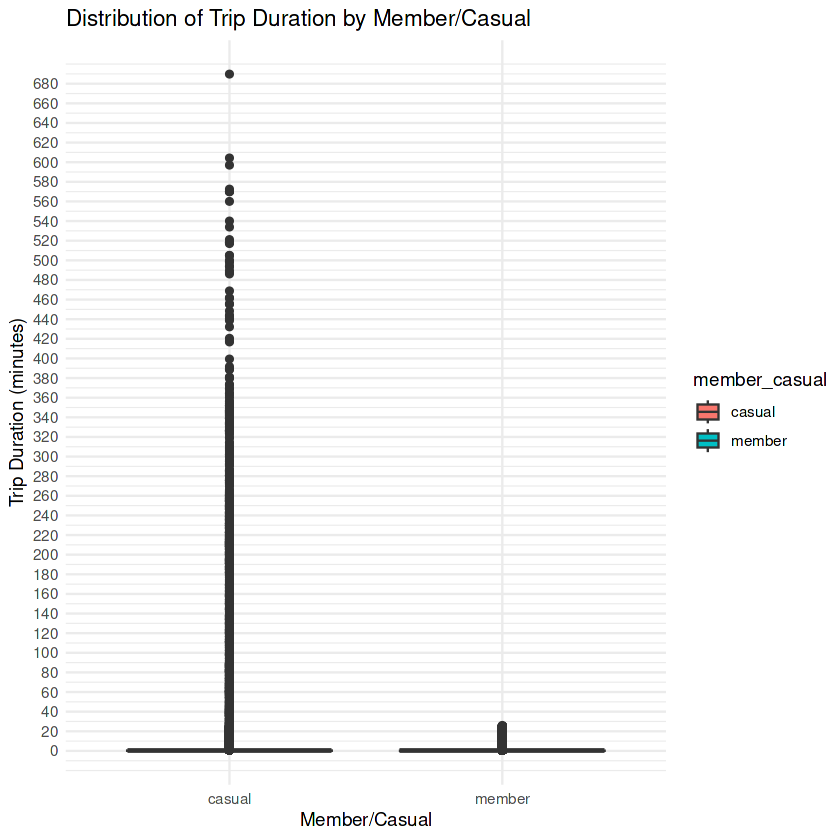

In [24]:
cyclistic_data_filtered %>%
  ggplot(aes(x = member_casual, y = trip_duration/60, fill = member_casual)) +
  geom_boxplot() +
  ggtitle("Distribution of Trip Duration by Member/Casual") +
  xlab("Member/Casual") +
  ylab("Trip Duration (minutes)") +
  theme_minimal() +
  scale_y_continuous(limits = c(0, NA), 
                     breaks = seq(0, ceiling(max(as.numeric(cyclistic_data_filtered$trip_duration))/60), 20))


## Member vs Casual: Rides by Rideable Type & Trip Duration

In [25]:
cyclistic_data_filtered %>%
  group_by(member_casual, rideable_type) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(member_casual, desc(trip_count))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,rideable_type,trip_count,avg_trip_duration
<chr>,<chr>,<int>,<drtn>
casual,electric_bike,1266836,16.07797 mins
casual,classic_bike,898378,28.63976 mins
casual,docked_bike,178251,123.04221 mins
member,classic_bike,1738035,13.81036 mins
member,electric_bike,1672648,11.40078 mins


#### Highlights
- Classic bike is the most popular rideable type among both member and casual riders.
- Electric bikes are more popular among members, while docked bikes are more popular among casual riders.
- Casual riders have longer average trip durations compared to member riders, regardless of the rideable type they choose.
- Docked bike trips by casual riders have the longest average duration among all the rideable types.
- Classic bike trips by members have the largest trip count.

## Member vs Casual: Rides by Day of the Week

In [26]:
cyclistic_data_filtered %>%
  group_by(member_casual, day_of_week) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(member_casual, desc(trip_count))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day_of_week,trip_count,avg_trip_duration
<chr>,<chr>,<int>,<drtn>
casual,Saturday,474411,32.49762 mins
casual,Sunday,392873,34.09311 mins
casual,Friday,337251,27.95366 mins
casual,Thursday,311806,25.40727 mins
casual,Monday,280940,29.05260 mins
casual,Wednesday,277943,24.52834 mins
casual,Tuesday,268241,25.68337 mins
member,Thursday,540889,12.20727 mins
member,Wednesday,535825,12.02408 mins


#### Highlights
- Casual riders have longer average trip duration than members across all days of the week.
- Casual riders have the highest average trip duration on Sundays and Saturdays, and the lowest on Wednesdays and Thursdays.
- Member riders have relatively consistent average trip durations across all days of the week.
- Member riders take the must rides on Thusday and Wednesdays. While casual riders on Saturday and Sundays.
- Member riders takes less rides on Sundays and Saturdays. While casual rides on Wenesday and Tuesdays.
- Both casual and member riders have the highest trip count on Saturdays and the lowest on Sundays.

## Member vs Casual: Rides by Daytime

In [27]:
cyclistic_data_filtered %>%
  group_by(member_casual, daytime_start) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(member_casual,desc(trip_count))

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,daytime_start,trip_count,avg_trip_duration
<chr>,<chr>,<int>,<drtn>
casual,afternoon,1060147,29.62389 mins
casual,night,712884,28.39228 mins
casual,morning,570434,28.72164 mins
member,afternoon,1447953,12.98232 mins
member,morning,1055007,11.86577 mins
member,night,907723,12.95122 mins


#### Highlights
- For both casual and member riders, the highest trip count is during the afternoon.
- The average trip duration is higher for casual riders in the afternoon, while for member riders, it is higher in the morning.
- Casual riders have a higher average trip duration at night than during the morning, while for member riders, it is the opposite.
- There are more member riders than casual riders during the morning, while the opposite is true for the afternoon and at night.

## Member vs Casual: Rides by Start Station Name

In [28]:
cyclistic_data_filtered %>%
  filter(member_casual == "member") %>%
  group_by(start_station_name) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(desc(trip_count))

start_station_name,trip_count,avg_trip_duration
<chr>,<int>,<drtn>
NA,493449,11.949824 mins
Kingsbury St & Kinzie St,25239,9.545925 mins
Clark St & Elm St,22515,12.333987 mins
Wells St & Concord Ln,21595,11.806319 mins
University Ave & 57th St,21151,8.300733 mins
Clinton St & Washington Blvd,20631,10.713851 mins
Ellis Ave & 60th St,20574,6.711625 mins
Loomis St & Lexington St,19551,10.032600 mins
Wells St & Elm St,19408,11.108548 mins


#### Key Takeways
Member rider top 5 Start Stations by trip count:

Kingsbury St & Kinzie St          
Clark St & Elm St                 
Wells St & Concord Ln             
University Ave & 57th St         
Clinton St & Washington Blvd      


In [29]:
cyclistic_data_filtered %>%
  filter(member_casual == "casual") %>%
  group_by(start_station_name) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(desc(trip_count))


start_station_name,trip_count,avg_trip_duration
<chr>,<int>,<drtn>
NA,350053,14.62011 mins
Streeter Dr & Grand Ave,58269,47.73713 mins
DuSable Lake Shore Dr & Monroe St,31980,47.86933 mins
Millennium Park,25680,56.75481 mins
Michigan Ave & Oak St,25326,39.16586 mins
DuSable Lake Shore Dr & North Blvd,23700,36.71354 mins
Shedd Aquarium,20485,44.57723 mins
Theater on the Lake,18471,34.89241 mins
Wells St & Concord Ln,16343,22.09430 mins


#### Key Takeways
Casual rider top 5 Start Stations by trip count:

Streeter Dr & Grand Ave             
DuSable Lake Shore Dr & Monroe St    
Millennium Park	25680
Michigan Ave & Oak St               
DuSable Lake Shore Dr & North Blvd     

In [30]:
## Member vs Casual: Rides by End Station Name

In [31]:
cyclistic_data_filtered %>%
  filter(member_casual == "member") %>%
  group_by(end_station_name) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(desc(trip_count))

end_station_name,trip_count,avg_trip_duration
<chr>,<int>,<drtn>
NA,491008,13.912890 mins
Kingsbury St & Kinzie St,25093,8.907031 mins
Clark St & Elm St,22835,11.314165 mins
Wells St & Concord Ln,22233,11.347266 mins
University Ave & 57th St,21650,7.224239 mins
Clinton St & Washington Blvd,21406,8.933901 mins
Ellis Ave & 60th St,20388,6.983927 mins
Clinton St & Madison St,20089,9.599526 mins
Loomis St & Lexington St,19382,9.573323 mins


#### Key Takeways
Member rider top 5 end Stations by trip count:

Kingsbury St & Kinzie St          
Clark St & Elm St                 
Wells St & Concord Ln             
University Ave & 57th St          
Clinton St & Washington Blvd   

In [32]:
cyclistic_data_filtered %>%
  filter(member_casual == "casual") %>%
  group_by(end_station_name) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  arrange(desc(trip_count))

end_station_name,trip_count,avg_trip_duration
<chr>,<int>,<drtn>
NA,411631,56.65663 mins
Streeter Dr & Grand Ave,60090,36.93900 mins
DuSable Lake Shore Dr & Monroe St,29672,37.01525 mins
Millennium Park,26856,36.47152 mins
Michigan Ave & Oak St,26524,36.45220 mins
DuSable Lake Shore Dr & North Blvd,26192,30.76637 mins
Theater on the Lake,19447,33.42410 mins
Shedd Aquarium,18784,29.68320 mins
Wells St & Concord Ln,15647,16.64995 mins


#### Key Takeways
Casual rider top 5 end Stations by trip count:

Streeter Dr & Grand Ave              
DuSable Lake Shore Dr & Monroe St    
Millennium Park
Michigan Ave & Oak St               
DuSable Lake Shore Dr & North Blvd   

#### Highlight
- Casual and Member riders use different stations

# Data Visualization

In [33]:
# Create a new column with month-year format. We do this to remove timestamp

cyclistic_data_filtered$date <- format(as.Date(cyclistic_data_filtered$started_at), "%Y-%m")


In [34]:
# Grouped by month-year and member_casual, and count the number of rides
rides_per_month <- cyclistic_data_filtered %>%
  group_by(date, member_casual) %>%
  summarise(num_rides = n(), .groups = 'drop')


## Member vs Casual: Number of rides by month-year

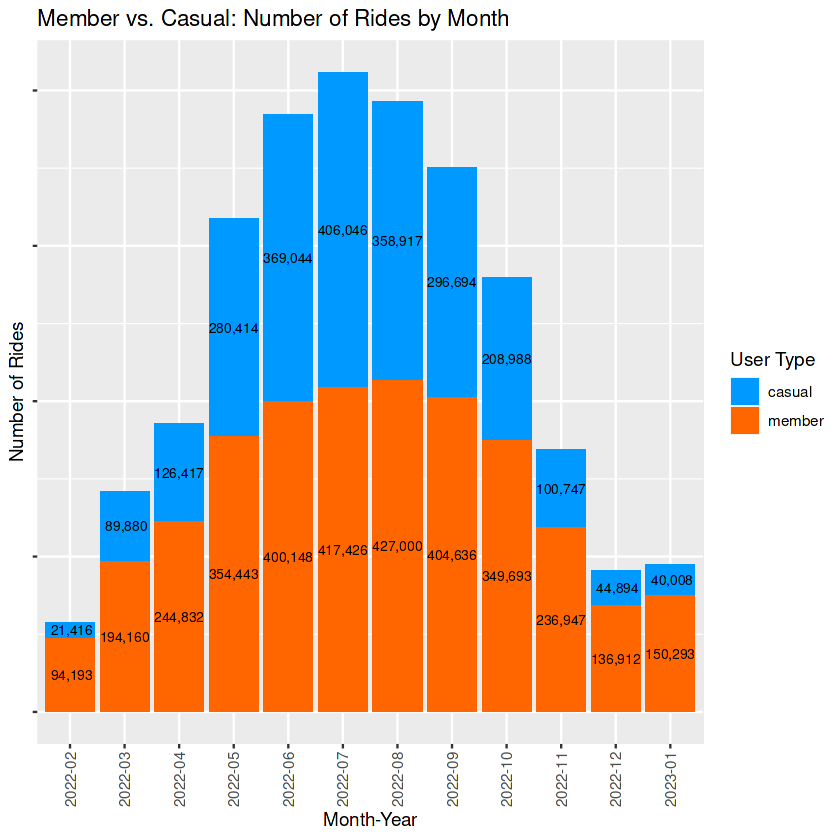

In [35]:
ggplot(rides_per_month, aes(x = date, y = num_rides, fill = member_casual)) +
  geom_col() +
  labs(x = "Month-Year", y = "Number of Rides", fill = "User Type") +
  ggtitle("Member vs. Casual: Number of Rides by Month") +
  scale_fill_manual(values = c("#0099FF", "#FF6600")) +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),
        axis.text.y = element_blank()) +
  geom_text(aes(label = format(num_rides, big.mark = ",")), position = position_stack(vjust = 0.5), size = 2.8)


#### Highlights
- Causal and member riders are must active around summmer and less active in winter

## Member vs Casual: Number of rides by day of the week

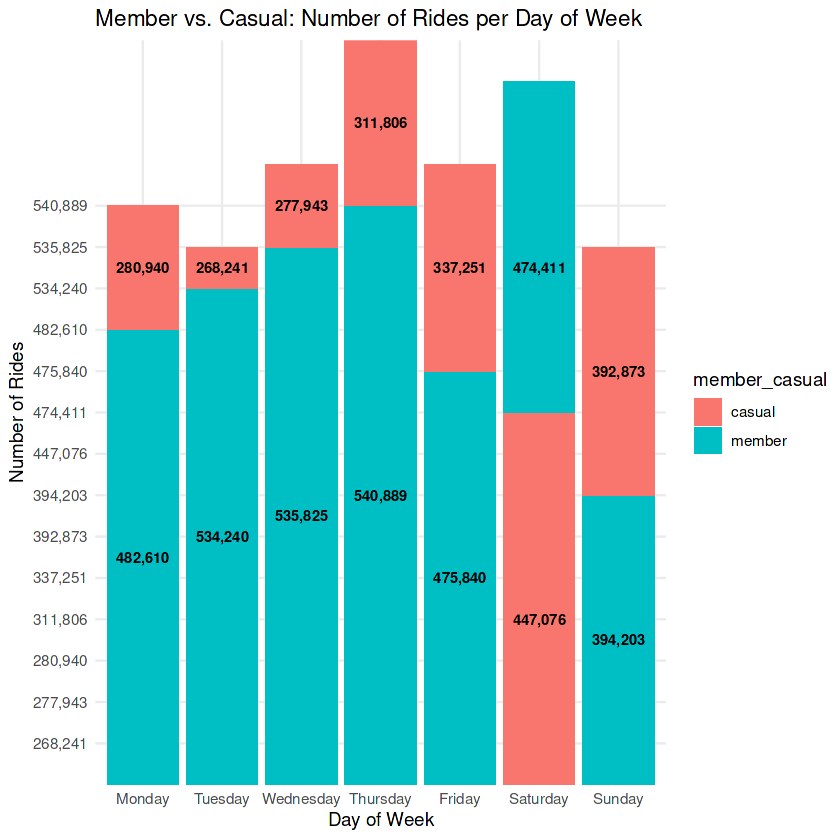

In [36]:
cyclistic_data_filtered %>%
  count(day_of_week, member_casual, sort = TRUE) %>%
  mutate(n = scales::comma(n)) %>%
  ggplot(aes(x = factor(day_of_week, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")), y = n, fill = member_casual)) +
  geom_col(position = "stack") +
  geom_text(aes(label = n, group = member_casual), 
            position = position_stack(vjust = 0.5), 
            size = 3, 
            fontface = "bold") +
  ggtitle("Member vs. Casual: Number of Rides per Day of Week") +
  xlab("Day of Week") +
  ylab("Number of Rides") +
  theme_minimal()

## Member vs. Casual: Trip Count by Rideable Type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


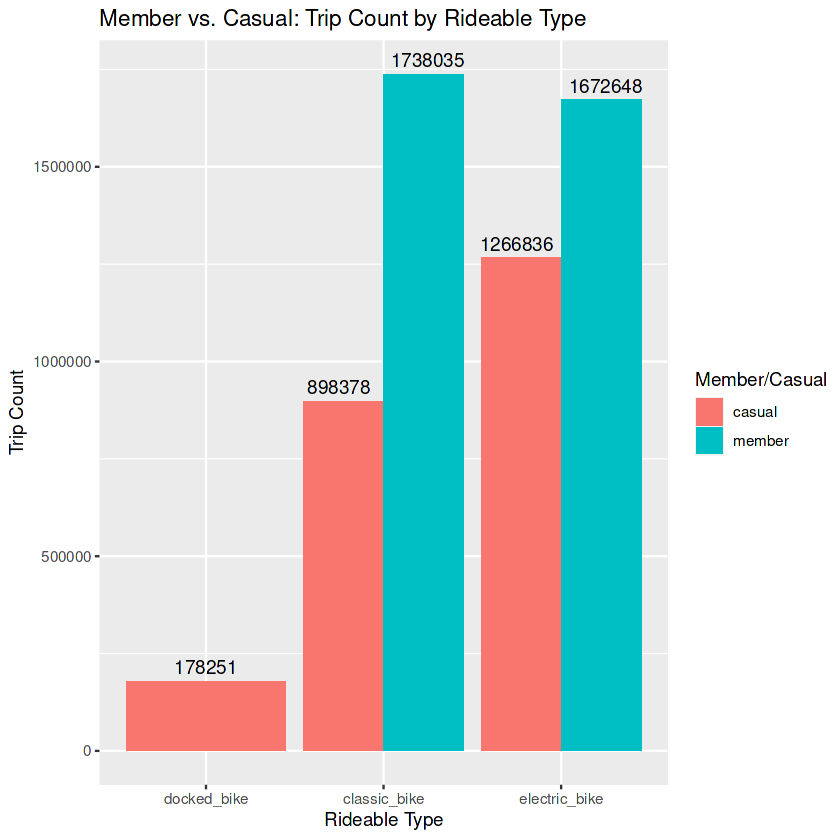

In [37]:
rideable_type_plot <- cyclistic_data_filtered %>%
  group_by(member_casual, rideable_type) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  ungroup() %>%
  arrange(desc(-trip_count))
ggplot(rideable_type_plot, aes(x = factor(rideable_type, levels = c("docked_bike", "classic_bike", "electric_bike")), y = trip_count, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Member vs. Casual: Trip Count by Rideable Type", x = "Rideable Type", y = "Trip Count", fill = "Member/Casual") +
  geom_text(aes(label = trip_count), position = position_dodge(width = 1), vjust = -0.5)

## Member vs. Casual: Trip count by daytime start

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


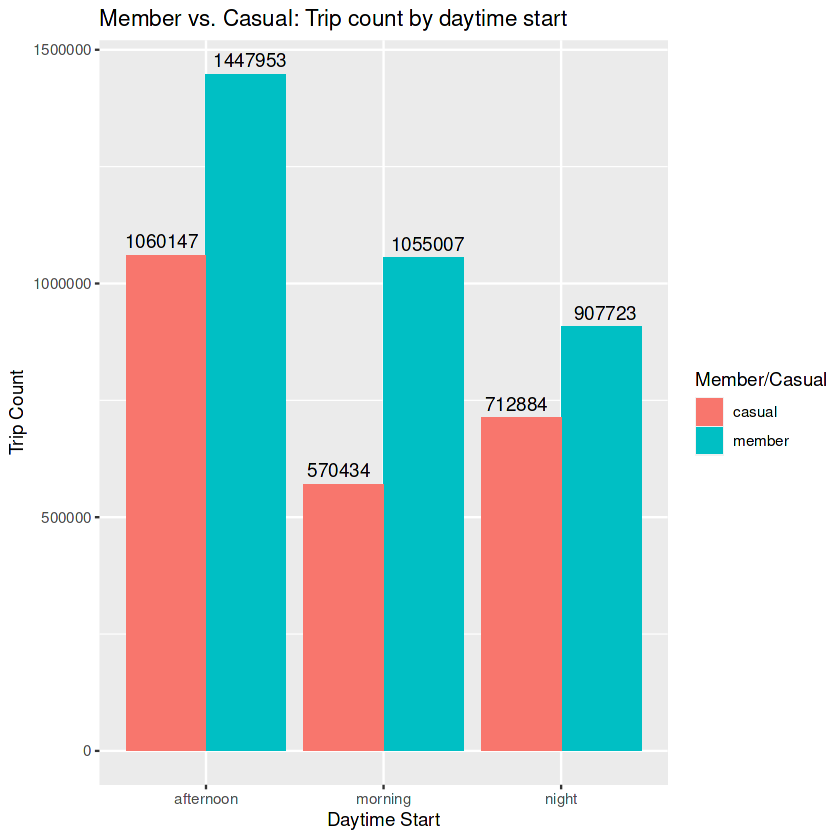

In [38]:
daytime_start_plot <- cyclistic_data_filtered %>%
  group_by(member_casual, daytime_start) %>%
  summarise(trip_count = n(), 
            avg_trip_duration = mean(trip_duration, na.rm = TRUE)) %>%
  ungroup()  %>%
  arrange(desc(trip_count))
ggplot(daytime_start_plot, aes(x = daytime_start, y = trip_count, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Member vs. Casual: Trip count by daytime start", x = "Daytime Start", y = "Trip Count", fill = "Member/Casual") +
  geom_text(aes(label = trip_count), position = position_dodge(width = 1), vjust = -0.5)

## Casual vs Member: Top 20 Start Stations by Trip Count

#### Code description
- Group and summarise the data by start station name and member/casual status
- Sort the data by total trip count for each station
- Limit the data to the top stations based on the number of trips
- Filter the original data to include only the top stations
- Accounting for nulls

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


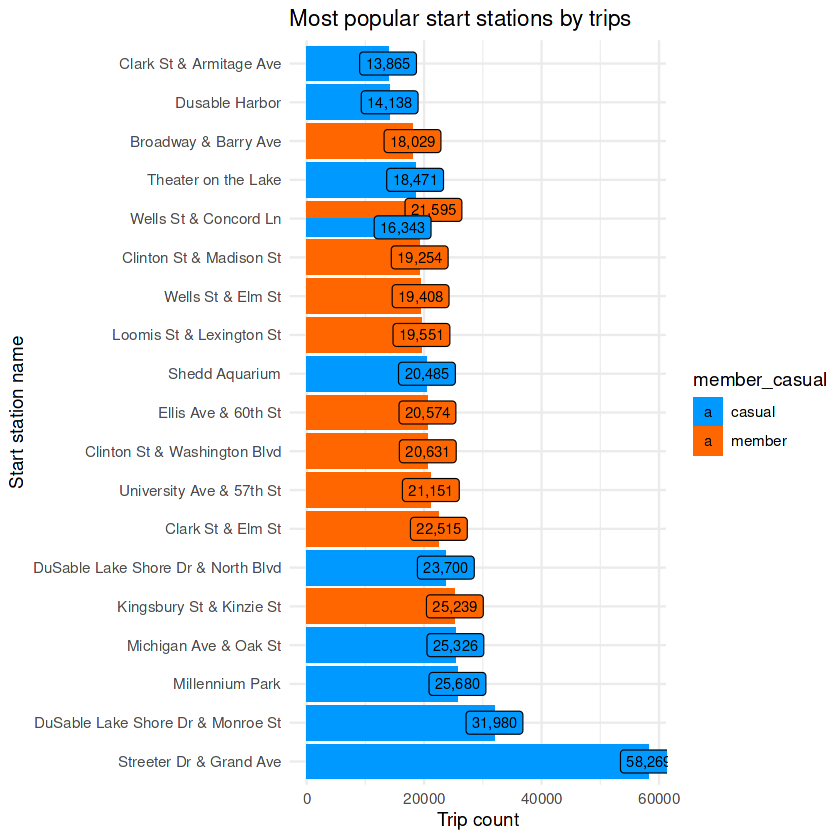

In [39]:
cyclistic_data_filtered %>%
  filter(!is.na(start_station_name)) %>%
  group_by(member_casual, start_station_name) %>%
  summarise(trip_count = n()) %>%
  arrange(start_station_name, desc(trip_count)) %>%
  top_n(10, trip_count) %>%
  ggplot(aes(x = trip_count, y = reorder(start_station_name, -trip_count), fill = member_casual)) +
  geom_col(position = position_dodge()) +
  scale_fill_manual(values = c("#0099FF", "#FF6600")) +
  labs(title = "Most popular start stations by trips",
       x = "Trip count", y = "Start station name") +
  theme_minimal() +
  geom_label(aes(label=format(trip_count, big.mark=",")), position = position_dodge(width=0.9), size=3)


## Casual vs Member: Top 20 End Stations by Trip Count

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


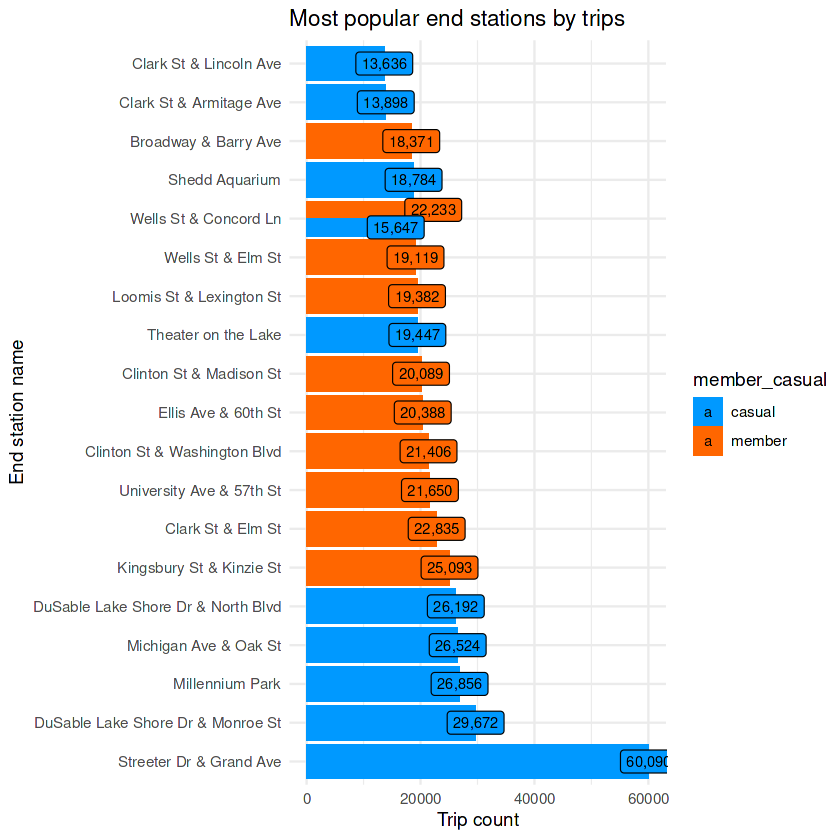

In [40]:
cyclistic_data_filtered %>%
  filter(!is.na(end_station_name)) %>%
  group_by(member_casual, end_station_name) %>%
  summarise(trip_count = n()) %>%
  arrange(end_station_name, desc(trip_count)) %>%
  top_n(10, trip_count) %>%
  ggplot(aes(x = trip_count, y = reorder(end_station_name, -trip_count), fill = member_casual)) +
  geom_col(position = position_dodge()) +
  scale_fill_manual(values = c("#0099FF", "#FF6600")) +
  labs(title = "Most popular end stations by trips",
       x = "Trip count", y = "End station name") +
  theme_minimal() +
  geom_label(aes(label=format(trip_count, big.mark=",")), position = position_dodge(width=0.9), size=3)


# Recommendations Base on the Analysis

Based on the key points, here are the top three recommendations for Cyclistic to design a new marketing strategy to convert casual riders into annual members:

Offer discounted annual memberships to casual riders who use the service frequently on Saturdays and Sundays, as these are the days when they take the most trips, and the average trip duration is the highest.

Create targeted marketing campaigns that emphasize the convenience and and benefits of having a membership at popular start stations for casual riders such as Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe St , Millennium Park, and Michigan Ave & Oak St  

Consider offering a loyalty program that rewards frequent riders to incentivize membership, especially those who use the service in the morning or at night, as these are the times when there are more member or casual riders respectively, and they take longer trips on average.